<a href="https://colab.research.google.com/github/sahalshajahan/Loan-Approval/blob/main/Loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LOAN STATUS PREDICTION:**

**Loan status prediction uses machine learning algorithms to analyze an applicant's financial data and predict the likelihood of their loan being approved. This helps lenders assess risk, automate processes, and make fairer lending decisions.**

# **Import libraries.**

In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBRFClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt


In [27]:
df=pd.read_csv('/content/drive/MyDrive/loan_approval_dataset.csv')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [15]:
df.drop(['loan_id'],axis=1,inplace=True)
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [28]:
df[' education']

0            Graduate
1        Not Graduate
2            Graduate
3            Graduate
4        Not Graduate
            ...      
4264         Graduate
4265     Not Graduate
4266     Not Graduate
4267     Not Graduate
4268         Graduate
Name:  education, Length: 4269, dtype: object

#isna().sum()
Is used to check the missing values in a dataset.

In [29]:
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

#dtypes
Is used to check the type.

In [30]:
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

# **SEABORN**
Seaborn is a powerful Python library built on top of Matplotlib, specifically designed for creating statistical graphics.

**countplot()**

The countplot() function in Seaborn is a versatile tool for visualizing the frequency distribution of categorical variables in your data. It creates bar charts where the height of each bar represents the count of observations within a specific category. This helps you quickly understand the prevalence of each category and identify any patterns or imbalances in your data.

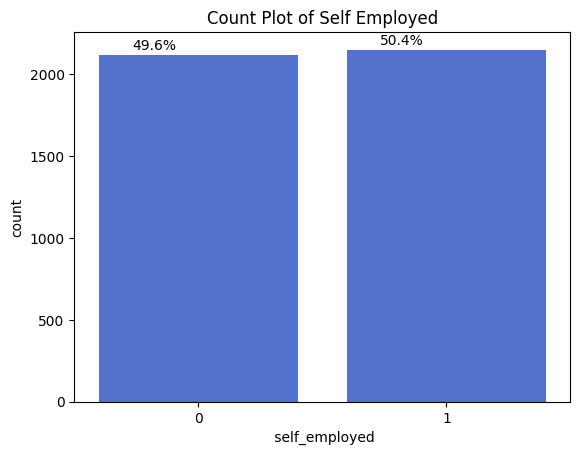

In [43]:
count=sns.countplot(x=' self_employed',data=df,color='royalblue')
plt.title('Count Plot of Self Employed')
total = len(df)
for i in count.patches:
  height = i.get_height()
  percentage = "{:.1f}%".format(100 * height / total)
  x = i.get_x() + i.get_width() / 6
  y = height + 30
  count.annotate(percentage, (x, y))

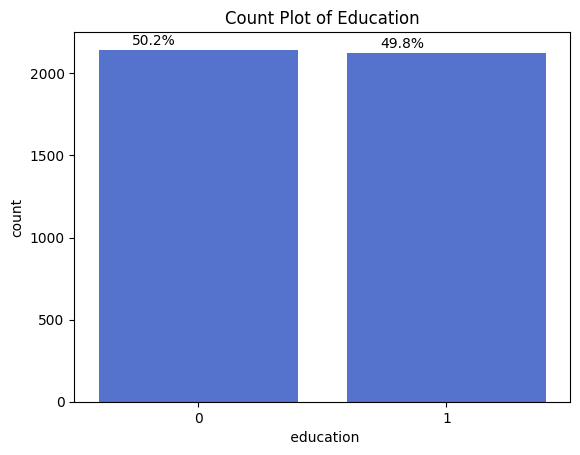

In [44]:
count=sns.countplot(x=' education',data=df,color='royalblue')
plt.title('Count Plot of Education')
total = len(df)
for i in count.patches:
  height = i.get_height()
  percentage = "{:.1f}%".format(100 * height / total)
  x = i.get_x() + i.get_width() / 6
  y = height + 30
  count.annotate(percentage, (x, y))

**barplot()**

barplot() is a fundamental function used to create bar charts, representing categorical data with rectangular bars whose heights or lengths are proportional to the values they represent.

Text(0.5, 1.0, 'Loan Term vs Cibil Score')

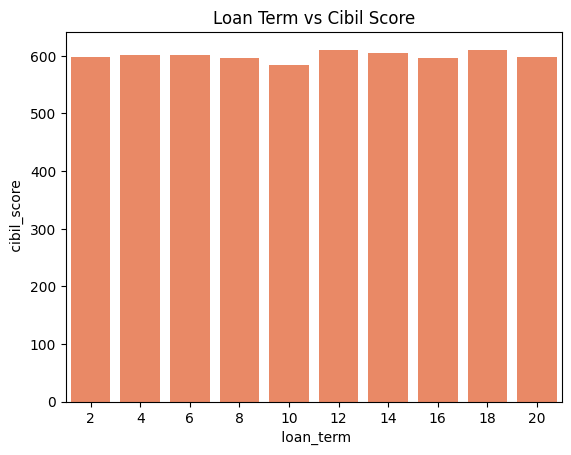

In [21]:
sns.barplot(x=' loan_term',y=' cibil_score',data=df,errorbar=None,color='coral')
plt.title('Loan Term vs Cibil Score')

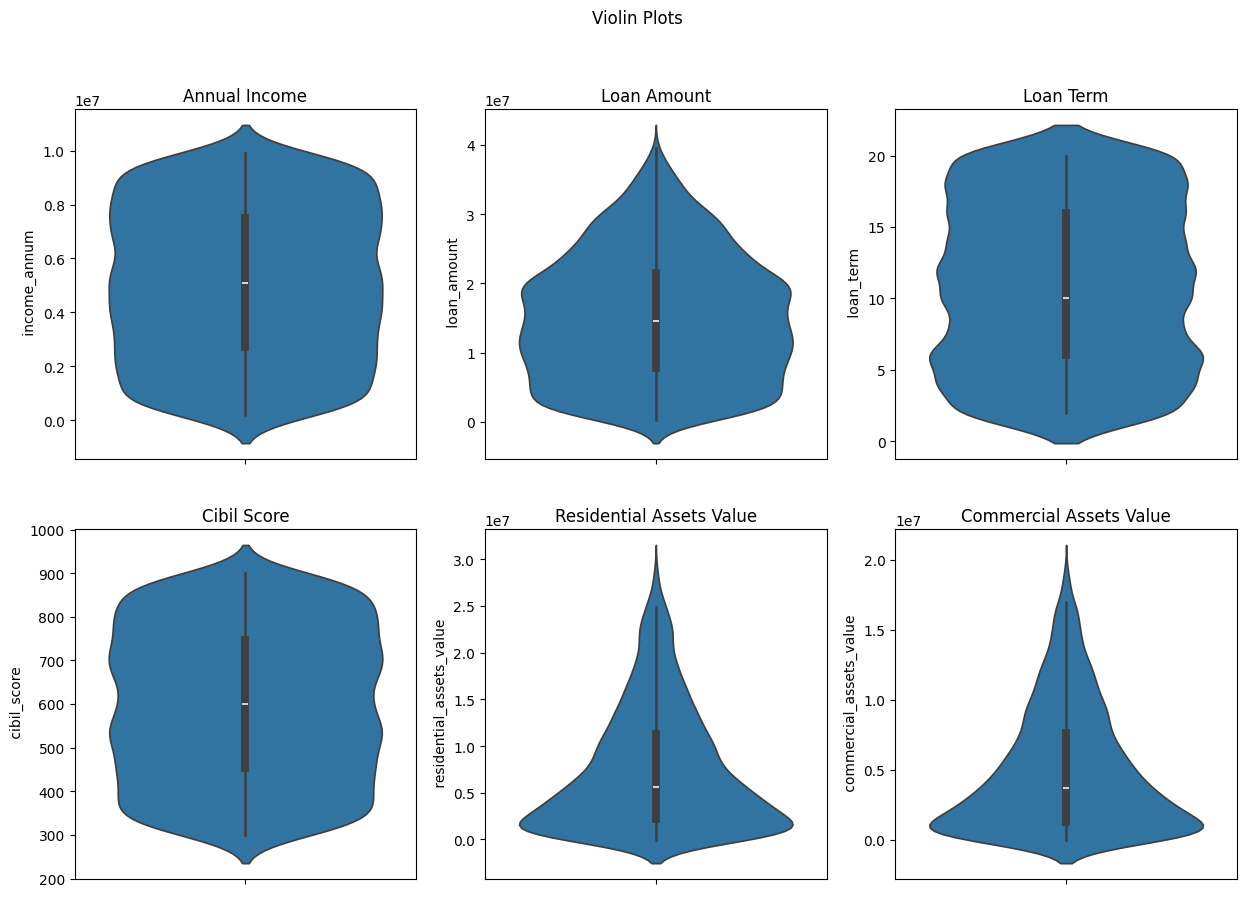

In [22]:
fig, axes = plt.subplots(2,3, figsize=(15,10))
sns.violinplot(y=' income_annum',ax=axes[0,0],data=df)
sns.violinplot(y=' loan_amount',ax=axes[0,1],data=df)
sns.violinplot(y=' loan_term',ax=axes[0,2],data=df)
sns.violinplot(y=' cibil_score',ax=axes[1,0],data=df)
sns.violinplot(y=' residential_assets_value',ax=axes[1,1],data=df)
sns.violinplot(y=' commercial_assets_value',ax=axes[1,2],data=df)
axes[0,0].set_title('Annual Income')
axes[0,1].set_title('Loan Amount')
axes[0,2].set_title('Loan Term')
axes[1,0].set_title('Cibil Score')
axes[1,1].set_title('Residential Assets Value')
axes[1,2].set_title('Commercial Assets Value')
plt.suptitle('Violin Plots')
plt.show()

**corr()**

The corr() function is commonly used in machine learning for calculating the correlation coefficient between two variables.

In [45]:
df.corr()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,1.000000,0.005326,-0.015536,0.001745,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765,-0.017685
no_of_dependents,0.005326,1.000000,-0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,0.018114
education,-0.015536,-0.002697,1.000000,0.023224,-0.011625,-0.010631,0.008417,0.004649,-0.010930,0.006763,-0.012471,-0.009424,0.004918
self_employed,0.001745,0.000765,0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,0.006144,-0.017998,0.004413,-0.000215,-0.000345
income_annum,0.012592,0.007266,-0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,0.015189
loan_amount,0.008170,-0.003366,-0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,-0.016150
loan_term,0.009809,-0.020111,0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,0.113036
cibil_score,0.016323,-0.009998,0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,-0.770518
residential_assets_value,0.020936,0.007376,-0.010930,0.006144,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,0.014367
commercial_assets_value,0.018595,-0.001531,0.006763,-0.017998,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,-0.008246


# **HEATMAP**

A heatmap is a graphical representation of a matrix, where each value in the matrix is encoded as a color intensity. This helps visualize the relationships and patterns between different variables in the data, particularly when you have many features and want to see their pairwise interactions.

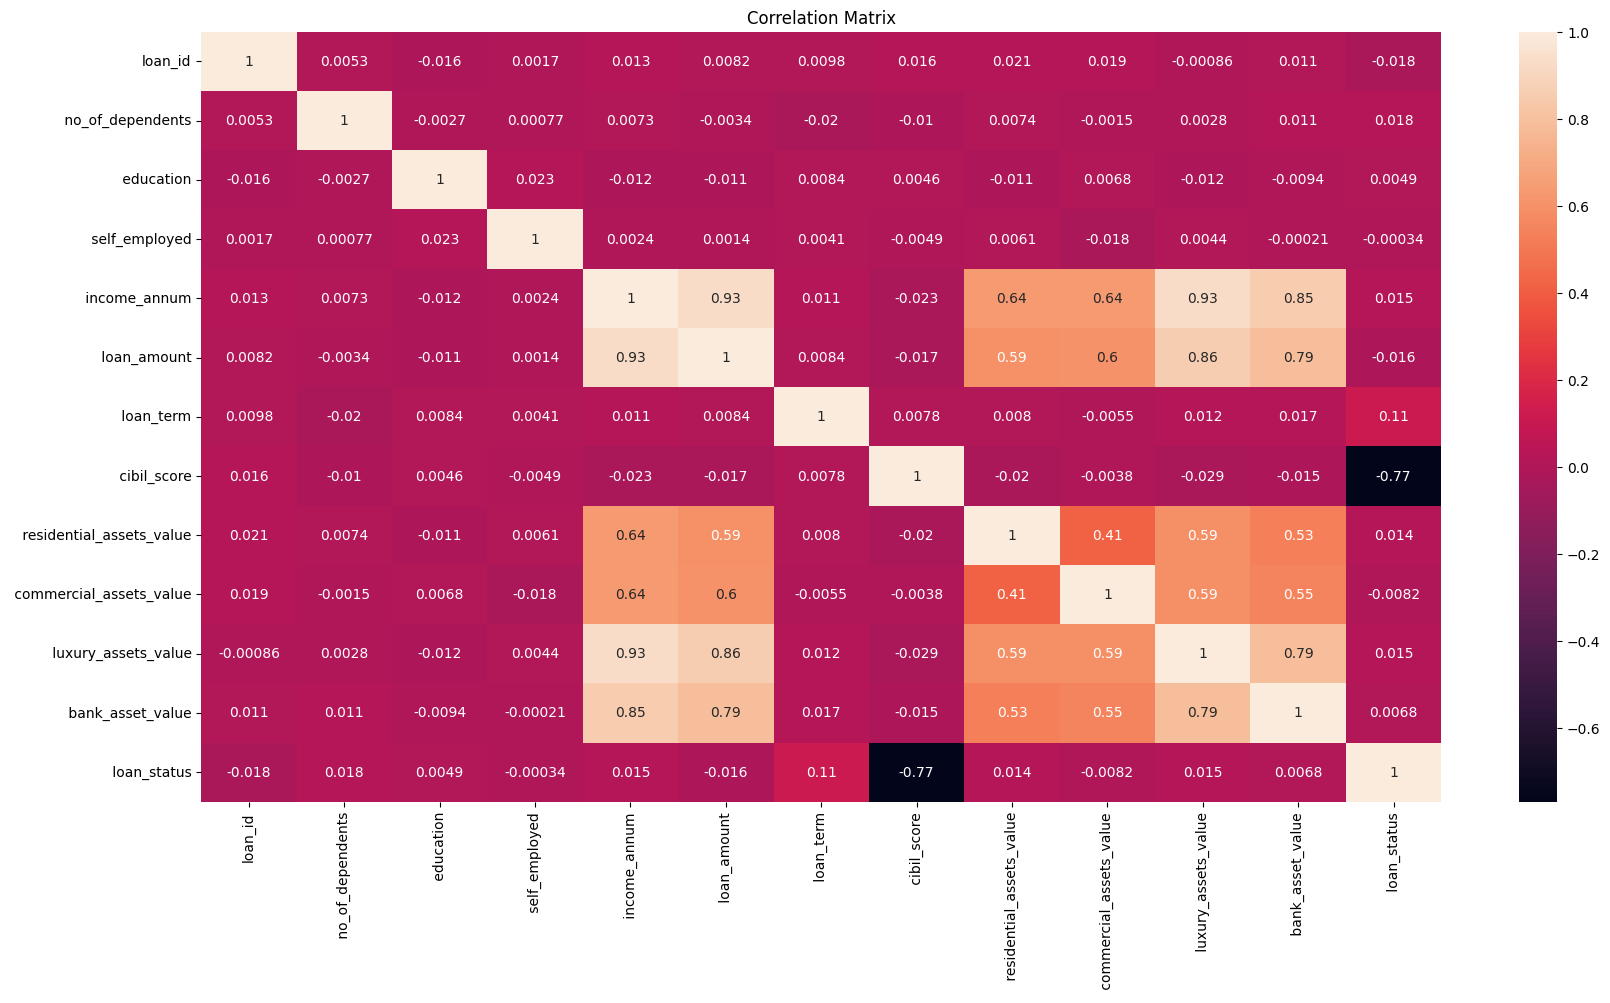

In [53]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

# **LabelEncoder()**.

Is used to convert the object into float/integer.

In [31]:
le=LabelEncoder()
df[' education']=le.fit_transform(df[' education'])
le1=LabelEncoder()
df[' self_employed']=le1.fit_transform(df[' self_employed'])
le2=LabelEncoder()
df[' loan_status']=le2.fit_transform(df[' loan_status'])
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,4267,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [32]:
X=df.iloc[:,:-1]
X

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,4267,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [33]:
X.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value'],
      dtype='object')

In [34]:
y=df.iloc[:,-1]
y

0       0
1       1
2       1
3       1
4       1
       ..
4264    1
4265    0
4266    1
4267    0
4268    0
Name:  loan_status, Length: 4269, dtype: int64

# **MinMaxScaler()**.

Using MinMaxScaler we normalize the numerical features in a dataset.Basically it rescales these features into a specific range,typically between 0 and 1.

In [35]:
scaler=MinMaxScaler()
scaler.fit(X)
x_scaled=scaler.fit_transform(X)
x_scaled

array([[0.00000000e+00, 4.00000000e-01, 0.00000000e+00, ...,
        9.07216495e-01, 5.75835476e-01, 5.44217687e-01],
       [2.34301781e-04, 0.00000000e+00, 1.00000000e+00, ...,
        1.13402062e-01, 2.18508997e-01, 2.24489796e-01],
       [4.68603561e-04, 6.00000000e-01, 0.00000000e+00, ...,
        2.31958763e-01, 8.48329049e-01, 8.70748299e-01],
       ...,
       [9.99531396e-01, 4.00000000e-01, 1.00000000e+00, ...,
        6.39175258e-01, 4.57583548e-01, 4.96598639e-01],
       [9.99765698e-01, 2.00000000e-01, 1.00000000e+00, ...,
        3.60824742e-02, 3.54755784e-01, 3.94557823e-01],
       [1.00000000e+00, 2.00000000e-01, 0.00000000e+00, ...,
        6.08247423e-01, 9.10025707e-01, 8.16326531e-01]])

# **train_test_split()**
 Using train_test_split we divide the dataset into two distinct datasets.
 training set and testing set


In [36]:
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=1)

# **THE BEST PERFORMING ALGORITHMS:**

KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       798
           1       0.83      0.86      0.84       483

    accuracy                           0.88      1281
   macro avg       0.87      0.88      0.87      1281
weighted avg       0.88      0.88      0.88      1281

0.8805620608899297

SVC()
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       798
           1       0.89      0.94      0.92       483

    accuracy                           0.94      1281
   macro avg       0.93      0.94      0.93      1281
weighted avg       0.94      0.94      0.94      1281

0.9352068696330992

GaussianNB()
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       798
           1       0.89      0.94      0.92       483

    accuracy                           0.93      1281
   macro avg       0.93      0.94

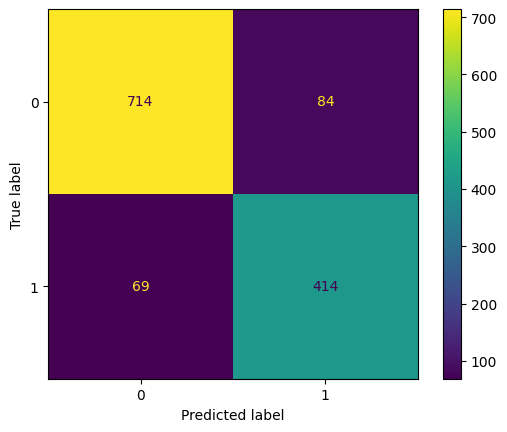

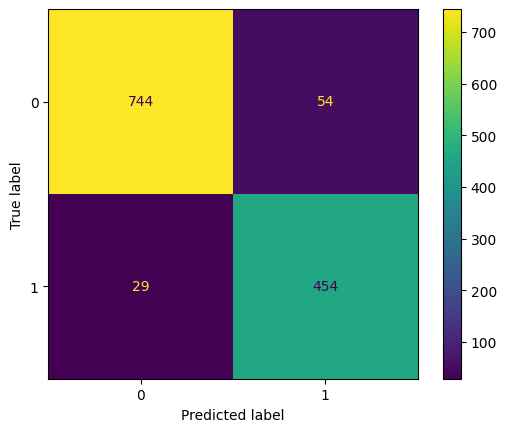

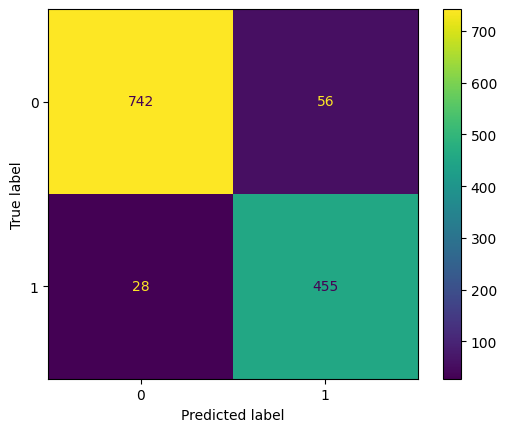

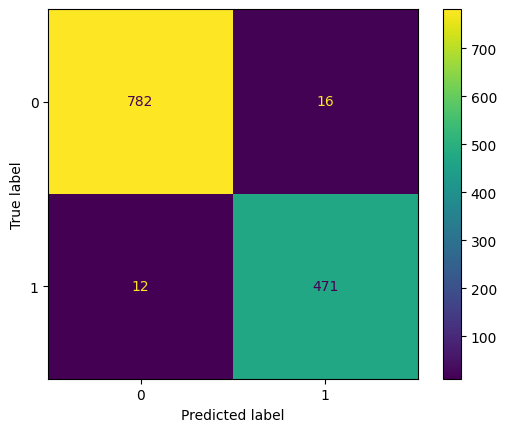

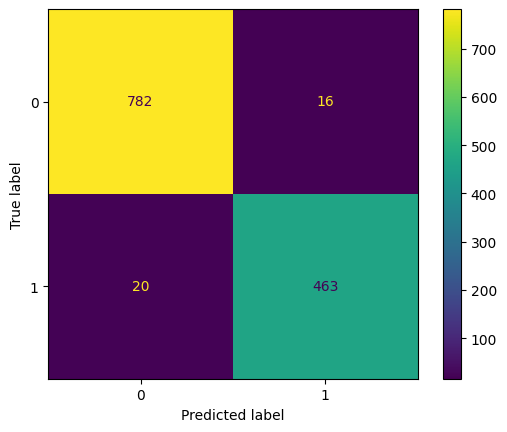

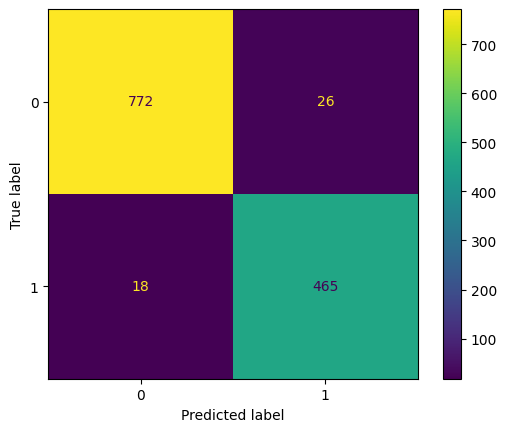

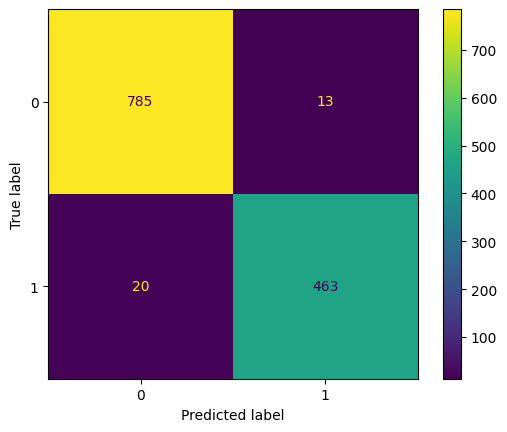

In [37]:
knn=KNeighborsClassifier(n_neighbors=3)
svc=SVC()
nb=GaussianNB()
dtc=DecisionTreeClassifier()
rf=RandomForestClassifier()
adb=AdaBoostClassifier()
xgb=XGBRFClassifier()
models=[knn,svc,nb,dtc,rf,adb,xgb]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(accuracy_score(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print()

# In here **RandomForest** algorithm has the best accuracy(98%) comparing with the rest of algorithms.

# **HYPERPARAMETER TUNING:**
Is used to find the optimal set of hyperparameters for your chosen machine learning model to achieve the best possible performance on your specific task.

In [38]:
params={'criterion':['gini','entropy','log_loss'],'max_depth':[1,2,3,4]}
clf=GridSearchCV(rf,params,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4]},
             scoring='accuracy')

In [39]:
print(clf.best_params_)

{'criterion': 'log_loss', 'max_depth': 4}


In [40]:
rf1=RandomForestClassifier(criterion='entropy',max_depth=4)
rf1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4)

In [41]:
y_pred1=rf1.predict(X_test)
y_pred1

array([1, 1, 1, ..., 0, 0, 0])

In [42]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       798
           1       0.94      0.97      0.95       483

    accuracy                           0.96      1281
   macro avg       0.96      0.97      0.96      1281
weighted avg       0.97      0.96      0.96      1281



# After using hyper parameter tuning we find out that the accuracy(96%) is less to that of before tuning so we stick to the previous accuracy(98%).

pairplot()

A pairplot is a specific type of visualization created using the Seaborn library in Python. It's used to explore pairwise relationships between all variables in a dataset.

regplot()

A regplot is a visualization tool typically used with the Seaborn library in Python. It specifically aids in visualizing the relationship between two variables and a fitted regression line. They usually combines two elements:
scattered plot and reggression line.

joinplot()

The joinplot() function in Seaborn is a powerful tool for creating a specific type of data visualization called a joint plot. These plots are a combination of several individual plots displayed together, offering a comprehensive view of the relationship between two variables and the distribution of each individual variable.

**boxplot()**

 It offers a concise way to visualize the distribution of numerical data, including its central tendency, spread, and potential outliers.

# **DEPLOYMENT**

In [54]:
import pickle
pickle.dump(rf,open('model1.sav','wb'))
pickle.dump(scaler,open('scaler1.sav','wb'))

In [55]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')